# ***Data Generation***

In [ ]:
import pandas as pd
import numpy as np
N_STORES = 20
N_WEEKS = 104
columns = ('store_num', 'year', 'week', 'p1_sales', 'p2_sales', 'p1_price', 'p2_price', 'p1_promo', 'p2_promo', 'country')
n_rows = N_STORES * N_WEEKS
store_sales = pd.DataFrame(np.empty(shape=(n_rows, 10)), columns=columns)
store_numbers = range(101, 101 + N_STORES)
store_country = dict(zip(store_numbers,['USA', 'USA', 'USA', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'GBR', 'GBR', 'GBR', 'BRA', 'BRA', 'JPN', 'JPN', 'JPN', 'JPN', 'AUS', 'CHN', 'CHN']))
i = 0
for store_num in store_numbers:
  for year in [1, 2]:
    for week in range(1, 53):
      store_sales.loc[i, 'store_num'] = store_num
      store_sales.loc[i, 'year'] = year
      store_sales.loc[i, 'week'] = week
      store_sales.loc[i, 'country'] = store_country[store_num]
      i += 1
store_sales.country = store_sales.country.astype(pd.CategoricalDtype())
store_sales.p1_promo = np.random.binomial(n=1, p=0.1, size=n_rows)
store_sales.p2_promo = np.random.binomial(n=1, p=0.15, size=n_rows)
store_sales.p1_price = np.random.choice([2.19, 2.29, 2.49, 2.79, 2.99], size=n_rows)
store_sales.p2_price = np.random.choice([2.29, 2.49, 2.59, 2.99, 3.19], size=n_rows)
sales_p1 = np.random.poisson(lam=120, size=n_rows)
sales_p2 = np.random.poisson(lam=100, size=n_rows)
log_p1_price = np.log(store_sales.p1_price)
log_p2_price = np.log(store_sales.p2_price)
sales_p1 = sales_p1 * log_p2_price/log_p1_price
sales_p2 = sales_p2 * log_p1_price/log_p2_price
store_sales.p1_sales = np.floor(sales_p1 * (1 + store_sales.p1_promo * 0.3))
store_sales.p2_sales = np.floor(sales_p2 * (1 + store_sales.p2_promo * 0.4))

# ***Summarizing Variables***


In [ ]:
#group by columns
store_sales.groupby('store_num').p1_sales.mean()

store_num
101.0    136.673077
102.0    131.605769
103.0    129.846154
104.0    136.701923
105.0    131.653846
106.0    134.923077
107.0    134.913462
108.0    133.307692
109.0    131.865385
110.0    129.980769
111.0    137.038462
112.0    133.048077
113.0    135.913462
114.0    134.019231
115.0    135.615385
116.0    131.721154
117.0    132.961538
118.0    132.990385
119.0    131.961538
120.0    127.230769
Name: p1_sales, dtype: float64

In [ ]:
#group by multiple factors
store_sales.groupby(['store_num', 'year']).p1_sales.mean()

store_num  year
101.0      1.0     136.807692
           2.0     136.538462
102.0      1.0     129.576923
           2.0     133.634615
103.0      1.0     128.384615
           2.0     131.307692
104.0      1.0     143.134615
           2.0     130.269231
105.0      1.0     133.692308
           2.0     129.615385
106.0      1.0     135.134615
           2.0     134.711538
107.0      1.0     135.211538
           2.0     134.615385
108.0      1.0     135.192308
           2.0     131.423077
109.0      1.0     129.519231
           2.0     134.211538
110.0      1.0     129.807692
           2.0     130.153846
111.0      1.0     138.692308
           2.0     135.384615
112.0      1.0     130.903846
           2.0     135.192308
113.0      1.0     136.692308
           2.0     135.134615
114.0      1.0     133.153846
           2.0     134.884615
115.0      1.0     135.557692
           2.0     135.673077
116.0      1.0     126.480769
           2.0     136.961538
117.0      1.0     132.3

In [ ]:
#pivot bro
store_sales.groupby(['store_num', 'year']).p1_sales.mean().unstack()

year,1.0,2.0
store_num,,
101.0,136.807692,136.538462
102.0,129.576923,133.634615
103.0,128.384615,131.307692
104.0,143.134615,130.269231
105.0,133.692308,129.615385
106.0,135.134615,134.711538
107.0,135.211538,134.615385
108.0,135.192308,131.423077
109.0,129.519231,134.211538


In [ ]:
p1_sales_by_country = store_sales.groupby(['country']).p1_sales.sum()
p1_sales_by_country

country
AUS    13831.0
BRA    27972.0
CHN    26956.0
DEU    69836.0
GBR    41484.0
JPN    55569.0
USA    41405.0
Name: p1_sales, dtype: float64

## Discrete Variables

In [ ]:
store_sales.p1_price.value_counts()
p1_table_0 = store_sales.p1_price.value_counts()

p1_price,2.19,2.29,2.49,2.79,2.99
p1_promo,,,,,
0,390,380,372,344,398
1,46,45,34,39,32


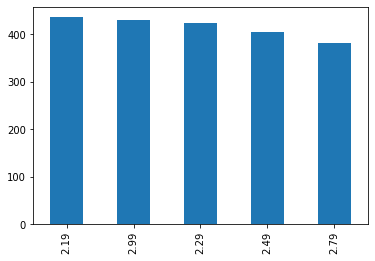

In [ ]:
p1_table_0.plot.bar()
pd.crosstab(store_sales.p1_promo, store_sales.p1_price)
store_sales.groupby('p1_promo').p1_price.value_counts().unstack()

In [ ]:
store_sales.groupby(['p1_promo', 'country']).p1_price.mean().unstack()

country,AUS,BRA,CHN,DEU,GBR,JPN,USA
p1_promo,,,,,,,
0,2.535263,2.554481,2.537368,2.560851,2.539481,2.542055,2.549932
1,2.590000,2.386000,2.534444,2.600000,2.442174,2.548824,2.410000


In [ ]:
p1_table_1 = store_sales.groupby('p1_promo').p1_price.value_counts()
p1_table_1 = p1_table_1.unstack()
p1_table_1.div(p1_table_0)

,2.19,2.29,2.49,2.79,2.99
p1_promo,,,,,
0,0.894495,0.894118,0.916256,0.898172,0.925581
1,0.105505,0.105882,0.083744,0.101828,0.074419


## Continuous Variables

In [ ]:
#minimum value
store_sales.p2_sales.min()
#maximum value
store_sales.p1_sales.max()
#arithmetic mean
store_sales.p1_promo.mean()
#median
store_sales.p2_sales.median()
#variance around the mean
store_sales.p1_sales.var()
#standard deviation
store_sales.p1_sales.std()
#median absolute deviation (a robust variance estimator)
store_sales.p1_sales.mad()
#percentiles
store_sales.p1_sales.quantile(q=[0.25, 0.5, 0.75])
store_sales.p1_sales.quantile(q=np.arange(0, 1.1, 0.1))
#interquartile range
def iqr(x):
  return x.quantile(0.75) - x.quantile(0.25)
iqr(store_sales.p1_sales)  
#IQR in a dataframe
pd.DataFrame([[store_sales.p1_sales.median(), store_sales.p2_sales.median()], [iqr(store_sales.p1_sales), iqr(store_sales.p2_sales)]],index=['Median sales', 'IQR'], columns=['p1_sales', 'p2_sales'])

,p1_sales,p2_sales
Median sales,130.0,97.0
IQR,40.0,32.0


#Summarizing Dataframes

In [ ]:
store_sales.describe()

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo
count,2080.000000,2080.00000,2080.00000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,110.500000,1.50000,26.50000,133.198558,100.757212,2.544856,2.713125,0.094231,0.152404
std,5.767668,0.50012,15.01194,29.658883,25.026570,0.303856,0.333086,0.292220,0.359498
min,101.000000,1.00000,1.00000,68.000000,54.000000,2.190000,2.290000,0.000000,0.000000
25%,105.750000,1.00000,13.75000,112.000000,83.000000,2.290000,2.490000,0.000000,0.000000
50%,110.500000,1.50000,26.50000,130.000000,97.000000,2.490000,2.590000,0.000000,0.000000
75%,115.250000,2.00000,39.25000,152.000000,115.000000,2.790000,2.990000,0.000000,0.000000
max,120.000000,2.00000,52.00000,277.000000,216.000000,2.990000,3.190000,1.000000,1.000000


In [ ]:
store_sales.p1_price.describe()

count    2080.000000
mean        2.544856
std         0.303856
min         2.190000
25%         2.290000
50%         2.490000
75%         2.790000
max         2.990000
Name: p1_price, dtype: float64